Evaluación del dataset MNIST con redes neuronales.
Autor: Rafael Payan

Importamos las librerías necesarias

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Cargamos el dataset MNIST

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Preprocesamos los datos

In [3]:
# Normalizar los valores de píxeles
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convertir etiquetas a one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Construccion del modelo de la red neuronal

In [4]:
model = tf.keras.Sequential([
    # Aplanar las imágenes 28x28 a un vector de 784 elementos
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    # Capa oculta 1 con 512 neuronas y activación ReLU
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Regularización con Dropout
    tf.keras.layers.Dropout(0.2),
    
    # Capa oculta 2 con 256 neuronas
    tf.keras.layers.Dense(256, activation='relu'),
    
    # Capa de salida con 10 neuronas (una por dígito) y activación softmax
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\rafau\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilamos el modelo

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Entrenamos el modelo

In [6]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8623 - loss: 0.4784 - val_accuracy: 0.9650 - val_loss: 0.1225
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9659 - loss: 0.1112 - val_accuracy: 0.9725 - val_loss: 0.0899
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9763 - loss: 0.0762 - val_accuracy: 0.9749 - val_loss: 0.0814
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9823 - loss: 0.0554 - val_accuracy: 0.9772 - val_loss: 0.0779
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9849 - loss: 0.0462 - val_accuracy: 0.9772 - val_loss: 0.0799
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9887 - loss: 0.0336 - val_accuracy: 0.9773 - val_loss: 0.0779
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9896 - loss: 0.0315 - val_accuracy: 0.9779 - val_loss: 0.0816
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9907 - loss: 0.0270 - val_accuracy: 0.

Evaluamos el modelo

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nPrecisión en prueba: {test_acc:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.9779 - loss: 0.0812

Precisión en prueba: 0.9779


Visualización de resultados de manera gráfica

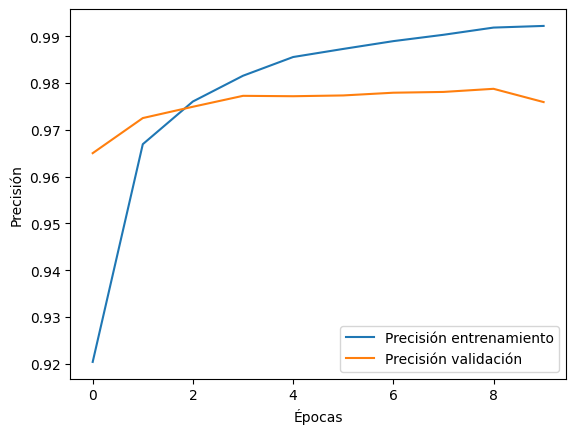

In [8]:
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


Ejemplo de predicciones en ejemplos individuales 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


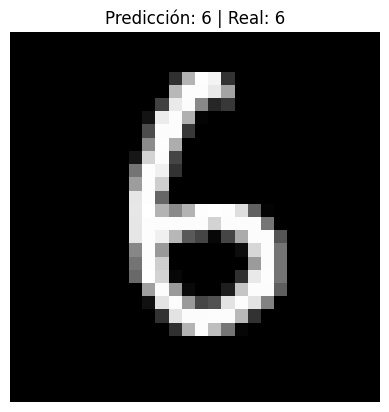

In [12]:
def predict_example(img_index):
    img = x_test[img_index]
    prediction = model.predict(img[np.newaxis, ...])
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(y_test[img_index])
    
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {predicted_label} | Real: {true_label}')
    plt.axis('off')
    plt.show()

# Para probar el modelo con una imagen específica utilizamos la funcion predict_example
# Con el indice de la imagen que quierramos probar
predict_example(21)  # Se puede el cambiar el índice para ver otras imágenes